<a href="https://colab.research.google.com/github/gayatri-2005/Machine-Learning-/blob/main/Multiple_Linear_Regression_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df= pd.read_csv('multiple_linear_regression_data.csv')

In [6]:
df.head()

,year,month,interest_rate,unemployment_rate,price
0,2021,1,3.2,6.5,220
1,2021,2,3.1,6.4,225
2,2021,3,3.0,6.3,230
3,2021,4,2.9,6.2,235
4,2021,5,2.8,6.1,240


In [7]:
df.drop(columns=['year','month'], inplace=True)

In [8]:
df.head()

,interest_rate,unemployment_rate,price
0,3.2,6.5,220
1,3.1,6.4,225
2,3.0,6.3,230
3,2.9,6.2,235
4,2.8,6.1,240


In [9]:
df.isnull().sum()

,0
interest_rate,0
unemployment_rate,0
price,0


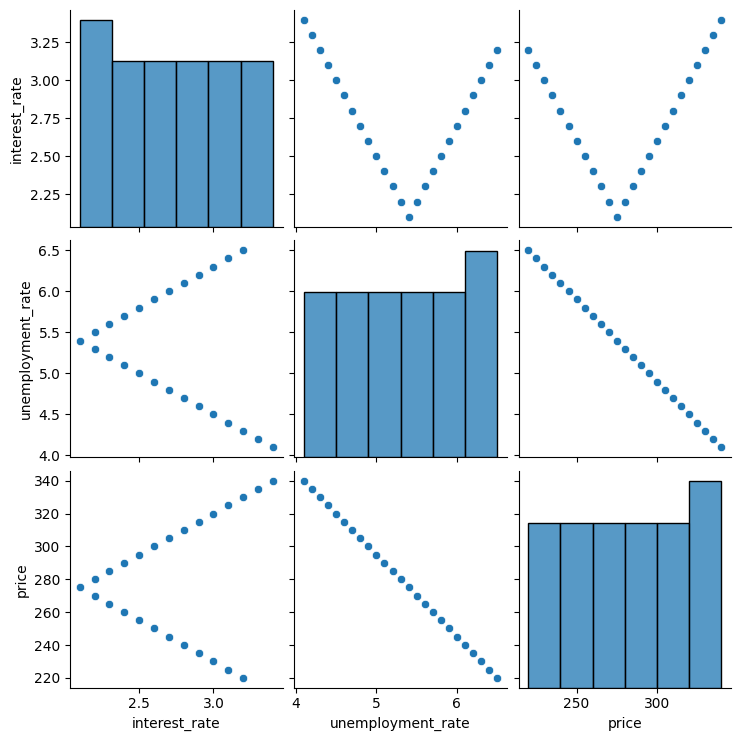

In [10]:
sns.pairplot(df)

In [11]:
df.corr()

,interest_rate,unemployment_rate,price
interest_rate,1.000000,-0.234978,0.234978
unemployment_rate,-0.234978,1.000000,-1.000000
price,0.234978,-1.000000,1.000000


Text(0, 0.5, 'unemployment_rate')

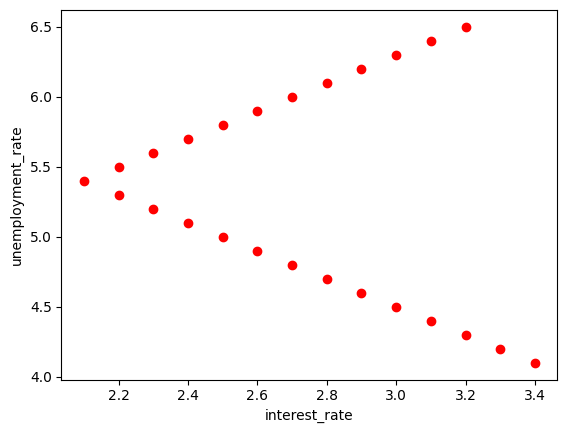

In [12]:
plt.scatter(df['interest_rate'],df['unemployment_rate'],c='r')
plt.xlabel('interest_rate')
plt.ylabel('unemployment_rate')

In [14]:
# independent and depedent features

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [15]:
X.head()

,interest_rate,unemployment_rate
0,3.2,6.5
1,3.1,6.4
2,3.0,6.3
3,2.9,6.2
4,2.8,6.1


In [16]:
y

,price
0,220
1,225
2,230
3,235
4,240
5,245
6,250
7,255
8,260
9,265


In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [20]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<Axes: xlabel='interest_rate', ylabel='price'>

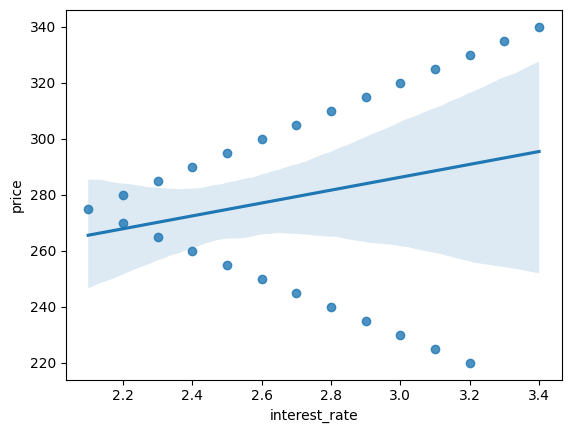

In [23]:
import seaborn as sns
sns.regplot(x='interest_rate', y='price', data=df)

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

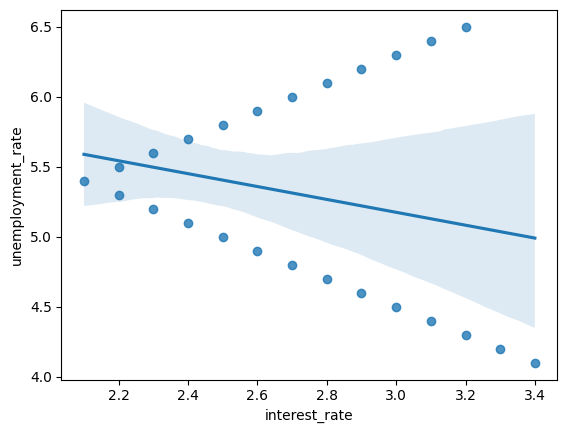

In [24]:
sns.regplot(x='interest_rate', y='unemployment_rate', data=df)

In [25]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [26]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(regression, X_train, y_train, cv=3,scoring='neg_mean_squared_error')

In [27]:
np.mean(scores)

np.float64(-1.3463226115771935e-27)

In [29]:
##Prediction

y_pred = regression.predict(X_test)
y_pred

array([260., 300., 220., 335., 275., 265., 285.])

In [35]:
#Performane metrics

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,root_mean_squared_error
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
rmse = np.sqrt(mse)
adjusted_r2 = 1-(1-r2)*(X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)
print('MSE:',mse)
print('MAE:',mae)
print('R2:',r2)
print('RMSE:',rmse)
print('Adjusted R2:',adjusted_r2)

MSE: 2.3079816198466174e-27
MAE: 4.06024420434343e-14
R2: 1.0
RMSE: 4.80414573035271e-14
Adjusted R2: 1.0


Text(0, 0.5, 'Predicted')

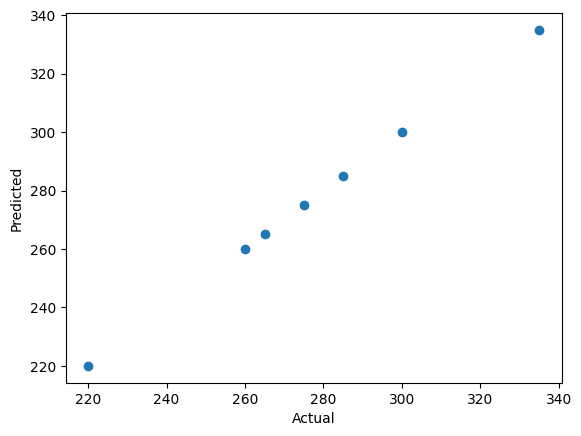

In [37]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

8     5.684342e-14
16    5.684342e-14
0     0.000000e+00
23    5.684342e-14
11    5.684342e-14
9     0.000000e+00
13    5.684342e-14
Name: price, dtype: float64


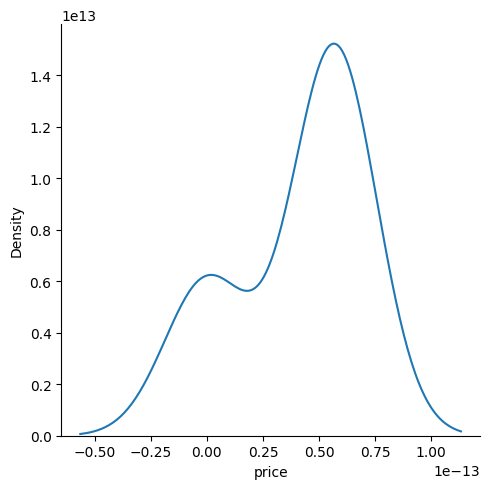

In [41]:
residuals = y_test - y_pred
print(residuals)
sns.displot(residuals,kind='kde')


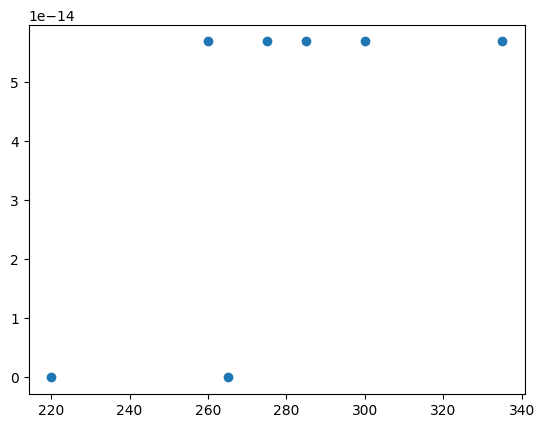

In [43]:
plt.scatter(y_pred,residuals)


In [44]:
#OLS Linear Regression
import statsmodels.api as sm
model = sm.OLS(y_train,X_train).fit()
model.summary()

/usr/local/lib/python3.12/dist-packages/statsmodels/stats/stattools.py:125: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skew = stats.skew(resids, axis=axis)
/usr/local/lib/python3.12/dist-packages/statsmodels/stats/stattools.py:126: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurtosis = 3 + stats.kurtosis(resids, axis=axis)
/usr/local/lib/python3.12/dist-packages/scipy/stats/_stats_py.py:1687: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  b2 = skew(a, axis, _no_deco=True)
/usr/local/lib/python3.12/dist-packages/scipy/stats/_stats_py.py:1792: RuntimeWarning: Precision loss occurred in moment calculation due t

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.017
Model:                            OLS   Adj. R-squared (uncentered):             -0.106
Method:                 Least Squares   F-statistic:                             0.1394
Date:                Wed, 21 Jan 2026   Prob (F-statistic):                       0.871
Time:                        16:07:14   Log-Likelihood:                         -127.04
No. Observations:                  18   AIC:                                      258.1
Df Residuals:                      16   BIC:                                      259.9
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          1.208e-13     73.363   1.65e-15      1.000    -155.523     155.523
x2           -37.1018     73.363     -0.506      0.620    -192.625     118.421
==============================================================================
Omnibus:                        2.755   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.252   Jarque-Bera (JB):                1.307
Skew:                          -0.275   Prob(JB):                        0.520
Kurtosis:                       1.800   Cond. No.                         1.34
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
print(regression.coef_)

[ 6.57524972e-16 -3.71017952e+01]


### Correcting OLS for Intercept

To make `statsmodels.OLS` comparable to `sklearn.LinearRegression`, we need to explicitly add a constant (intercept) term to our independent variables `X_train`.

In [46]:
X_train_sm = sm.add_constant(X_train)
model_sm_with_const = sm.OLS(y_train, X_train_sm).fit()
print(model_sm_with_const.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.156e+30
Date:                Wed, 21 Jan 2026   Prob (F-statistic):          1.23e-219
Time:                        16:12:29   Log-Likelihood:                 514.28
No. Observations:                  18   AIC:                            -1023.
Df Residuals:                      15   BIC:                            -1020.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        281.1111   2.44e-14   1.15e+16      0.0

Now, if you compare the coefficients (excluding the `const` term) from the `statsmodels` output with the `regression.coef_` from `sklearn`, they should be very similar. The `const` term in `statsmodels` represents the intercept, and it should be very close to the mean of `y_train` when `X_train` is scaled.

In [48]:
print(regression.coef_)

[ 6.57524972e-16 -3.71017952e+01]
